# Data Cleanup

In [383]:
import pandas as pd

path = r'/Users/rajharsora/Library/CloudStorage/Box-Box/Oldenburg-Shared/Raj/Behavioral Box Testing/H1.1/4.20.2023/4_20_23_H1.1_Coordinates Log 1.2023_Day2'

df = pd.read_csv(path, delimiter='\t', header=None)
df

,0,1
0,10:23:58.679,Arduino Logging
1,x = 127 y = 134,NaN
2,10:23:58.679,NaN
3,x = 127 y = 134,NaN
4,10:23:58.692,NaN
...,...,...
32059,x = 125 y = 133,NaN
32060,10:28:59.128,NaN
32061,x = 126 y = 133,NaN
32062,10:29:02.205,NaN


In [384]:
# Drop column "1"
df.drop(1, axis=1, inplace=True)
df

,0
0,10:23:58.679
1,x = 127 y = 134
2,10:23:58.679
3,x = 127 y = 134
4,10:23:58.692
...,...
32059,x = 125 y = 133
32060,10:28:59.128
32061,x = 126 y = 133
32062,10:29:02.205


In [385]:
# Seperate columns based on Timestamp or coodinate
Timestamps_df = df.iloc[::2]
Timestamps_df
Coordinates_df = df.iloc[1::2]
Coordinates_df

,0
1,x = 127 y = 134
3,x = 127 y = 134
5,x = 127 y = 134
7,x = 127 y = 135
9,x = 127 y = 134
...,...
32055,x = 126 y = 133
32057,x = 125 y = 133
32059,x = 125 y = 133
32061,x = 126 y = 133


In [386]:
#Reset the index for both of the new dataframes
Timestamps_df = Timestamps_df.reset_index(drop=True)
Coordinates_df = Coordinates_df.reset_index(drop=True)


In [387]:
#Seperate X and Y coordinates into two different columns

Coordinates_df[['X Coordinate', 'Y Coordinate']] = Coordinates_df[0].str.extract(r'^(x = \d+)\s(.*)$')

In [388]:
Coordinates_df

,0,X Coordinate,Y Coordinate
0,x = 127 y = 134,x = 127,y = 134
1,x = 127 y = 134,x = 127,y = 134
2,x = 127 y = 134,x = 127,y = 134
3,x = 127 y = 135,x = 127,y = 135
4,x = 127 y = 134,x = 127,y = 134
...,...,...,...
16027,x = 126 y = 133,x = 126,y = 133
16028,x = 125 y = 133,x = 125,y = 133
16029,x = 125 y = 133,x = 125,y = 133
16030,x = 126 y = 133,x = 126,y = 133


In [389]:
Coordinates_df.dropna(inplace=True)

In [390]:
Coordinates_df['X Coordinate'] = Coordinates_df['X Coordinate'].str.replace('x = ', '').astype(int)

Coordinates_df['Y Coordinate'] = Coordinates_df['Y Coordinate'].str.replace('y = ', '').astype(int)

In [391]:
Coordinates_df = Coordinates_df.rename(columns = {0: 'Raw Data'})
Timestamps_df = Timestamps_df.rename(columns = {0: 'Timestamp'})

In [392]:
Timestamps_df

,Timestamp
0,10:23:58.679
1,10:23:58.679
2,10:23:58.692
3,10:23:58.738
4,10:23:58.738
...,...
16027,10:28:58.870
16028,10:28:58.888
16029,10:28:58.907
16030,10:28:59.128


In [393]:
df_merged = pd.concat([Timestamps_df['Timestamp'], Coordinates_df['Raw Data'], Coordinates_df['X Coordinate'], Coordinates_df['Y Coordinate']], axis=1)

In [394]:
df_merged

,Timestamp,Raw Data,X Coordinate,Y Coordinate
0,10:23:58.679,x = 127 y = 134,127.0,134.0
1,10:23:58.679,x = 127 y = 134,127.0,134.0
2,10:23:58.692,x = 127 y = 134,127.0,134.0
3,10:23:58.738,x = 127 y = 135,127.0,135.0
4,10:23:58.738,x = 127 y = 134,127.0,134.0
...,...,...,...,...
16027,10:28:58.870,x = 126 y = 133,126.0,133.0
16028,10:28:58.888,x = 125 y = 133,125.0,133.0
16029,10:28:58.907,x = 125 y = 133,125.0,133.0
16030,10:28:59.128,x = 126 y = 133,126.0,133.0


In [395]:
df_merged = df_merged.drop_duplicates(subset=['Timestamp'])

In [396]:
df_merged

,Timestamp,Raw Data,X Coordinate,Y Coordinate
0,10:23:58.679,x = 127 y = 134,127.0,134.0
2,10:23:58.692,x = 127 y = 134,127.0,134.0
3,10:23:58.738,x = 127 y = 135,127.0,135.0
5,10:23:58.753,x = 128 y = 135,128.0,135.0
6,10:23:58.790,x = 127 y = 134,127.0,134.0
...,...,...,...,...
16027,10:28:58.870,x = 126 y = 133,126.0,133.0
16028,10:28:58.888,x = 125 y = 133,125.0,133.0
16029,10:28:58.907,x = 125 y = 133,125.0,133.0
16030,10:28:59.128,x = 126 y = 133,126.0,133.0


In [397]:
df_merged = df_merged.reset_index(drop=True)

In [398]:
df_merged

,Timestamp,Raw Data,X Coordinate,Y Coordinate
0,10:23:58.679,x = 127 y = 134,127.0,134.0
1,10:23:58.692,x = 127 y = 134,127.0,134.0
2,10:23:58.738,x = 127 y = 135,127.0,135.0
3,10:23:58.753,x = 128 y = 135,128.0,135.0
4,10:23:58.790,x = 127 y = 134,127.0,134.0
...,...,...,...,...
13781,10:28:58.870,x = 126 y = 133,126.0,133.0
13782,10:28:58.888,x = 125 y = 133,125.0,133.0
13783,10:28:58.907,x = 125 y = 133,125.0,133.0
13784,10:28:59.128,x = 126 y = 133,126.0,133.0


In [399]:
df_merged['Timestamp'] = pd.to_datetime(df_merged['Timestamp']).dt.time
df_merged

,Timestamp,Raw Data,X Coordinate,Y Coordinate
0,10:23:58.679000,x = 127 y = 134,127.0,134.0
1,10:23:58.692000,x = 127 y = 134,127.0,134.0
2,10:23:58.738000,x = 127 y = 135,127.0,135.0
3,10:23:58.753000,x = 128 y = 135,128.0,135.0
4,10:23:58.790000,x = 127 y = 134,127.0,134.0
...,...,...,...,...
13781,10:28:58.870000,x = 126 y = 133,126.0,133.0
13782,10:28:58.888000,x = 125 y = 133,125.0,133.0
13783,10:28:58.907000,x = 125 y = 133,125.0,133.0
13784,10:28:59.128000,x = 126 y = 133,126.0,133.0


# Analysis

<AxesSubplot:xlabel='Timestamp'>

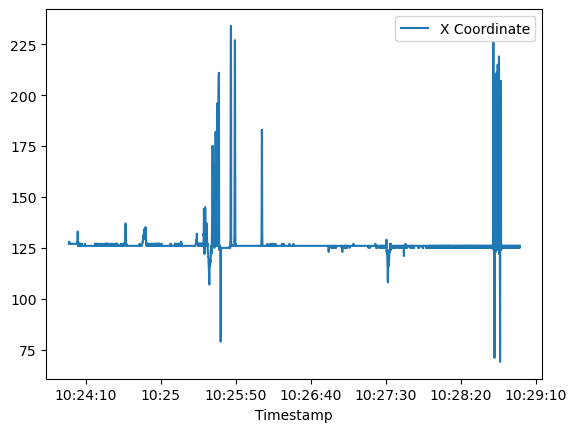

In [401]:
df_merged.plot(x = 'Timestamp', y = 'X Coordinate')
# To change the index, set the index after "df_merged"

In [ ]:
import matplotlib.pyplot as plt

y1 = 123
y2 = 130

fig,(ax1, ax2) = plt.subplots
ax1.fill_between(x, y1)
ax1.set_between(x, y1, y2)

#Change this to interactive graph

In [ ]:
#TODO Put X axis in ms from start of trial to finish of trial
# Color Plot over time (Drawnow)
#3D plot (Z = time elapsed)